[*********************100%***********************]  1 of 1 completed


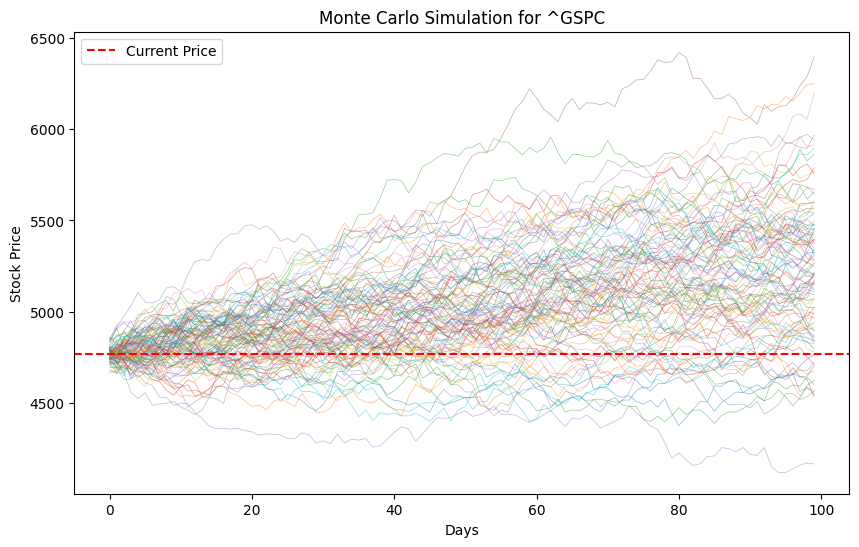

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#  Downloading historical data from the S&P 500
stock_symbol = "^GSPC"  # Ticker for S&P 500 Index
data = yf.download(stock_symbol, start="2023-01-01", end="2024-01-01")


# Extracting last closing price (Starting stock price for simulation)
S0 = float(data["Close"].iloc[-1].item())  # Last closing price

# Compute Historical Daily Returns & Volatility
returns = data["Close"].pct_change().dropna()
mu = np.mean(returns).item()# Mean daily return
sigma = np.std(returns, axis=0).item()  # Dailt Volatility

# Defining MOnte Carlo Simulation Parameters
num_days = 100  # Forecasting horizon (100 trading days)
num_simulations = 1000 # Number of simulated paths
dt = 1 # Time step (1 day)

# Initialize storage for simulated price paths
stock_paths = np.zeros((num_simulations, num_days))

# Running Monte Carlo Simulations (Stock price Evolution)
for i in range(num_simulations):
    Wt = np.random.normal(0, np.sqrt(dt), num_days)  # Generating random noise
    stock_paths[i, :] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma**2)* dt + sigma * Wt))

# Visulizing Simulated Stock Price Paths
plt.figure(figsize=(10, 6))
for i in range(100): # Showing only 100 paths for clarity
    plt.plot(stock_paths[i, :], linewidth=0.5, alpha=0.5)
plt.axhline(S0, color='r', linestyle='dashed', label="Current Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title(f"Monte Carlo Simulation for {stock_symbol}")
plt.legend()
plt.show()